In [1]:
#given the traffic volume data with the dates, holidays, weather information
#we will find out whether there are any correlation between these information 
#be it the holiday or weather condition with the traffic volume 

import pandas as pd # the pd is by convention

import numpy as np # as is the np

 

import matplotlib.pyplot as plt

import seaborn as sns

 

# To Plot matplotlib figures inline on the notebook

%matplotlib inline

plt.style.use('bmh')

import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid')

In [2]:
waste = pd.read_csv('waste.csv')

waste.head()

,year,waste_disposed_of,waste_recycled
0,2000,2.80,1.86
1,2001,2.80,2.23
2,2002,2.63,2.18
3,2003,2.51,2.22
4,2004,2.48,2.31


In [4]:
X = waste['year']
y = waste['waste_disposed_of']

# default is 75% / 25% train-test split
# If we want to keep the same split the value of 'random_state' should be kept the same
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [59]:
#waste recycled

X = waste['year']
y = waste['waste_recycled']

# default is 75% / 25% train-test split
# If we want to keep the same split the value of 'random_state' should be kept the same
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [60]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

np.set_printoptions(precision=2)




waste = pd.read_csv('waste.csv')

feature_names_waste = ['year']
X_waste = waste[feature_names_waste]
y_waste = waste['waste_recycled']


X_waste_2d = waste[['year']]
y_waste_2d = waste['waste_recycled']

X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state=0)

# MinMaxScaler, transforms features by scaling each feature to a given range.
# This estimator scales and translates each feature individually such that it is 
# in the given range on the training set, i.e. between zero and one.
# This transformation is often used as an alternative to zero mean, unit variance scaling.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(X_train_scaled)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(X_train_scaled))
print(utils.multiclass.type_of_target(X_train_scaled.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

[10  3  1  9  6  5  7  2  0  4  8]
continuous
binary
multiclass
[ 9  3  1 10  6  5  7  2  0  4  8]
continuous
multiclass
multiclass


ValueError: Unknown label type: 'continuous'

In [61]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_waste, y_waste)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[2.16 2.76 3.26 3.53]
R-squared test score: 0.977


In [62]:
from sklearn.linear_model import LinearRegression

# X_R1, y_R1 from regresion of one input variable (above)
X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [0.22]
linear model intercept (b): -436.587
R-squared score (training): 0.968
R-squared score (test): 0.771


<IPython.core.display.Javascript object>


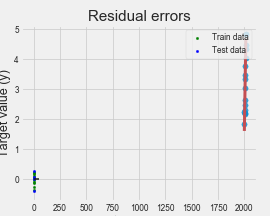

In [63]:
plt.figure(figsize=(5,4))
plt.scatter(X_waste, y_waste, marker= 'o', s=50, alpha=0.8)
plt.plot(X_waste, linreg.coef_ * X_waste + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [65]:
#  Check here how it is applied the points above
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('waste')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

waste
ridge regression linear model intercept: 3.136365863260576
ridge regression linear model coeff:
[0.17]
R-squared score (training): 0.107
R-squared score (test): -0.165
Number of non-zero features: 1


In [66]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sometimes with some data you get a convergence warning, in that case you can set
# max_iter to a larger value that typically os 20,000 or more, which will increase 
# the computation time accordingly
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('waste dataset')
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
print('Number of coeff:\n{}'.format(len(linlasso.coef_)))
print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))
print('All Features', list(X_waste))
print('Features with non-zero weight (sorted by absolute magnitude):')

# Descending magnitude
for e in sorted(list(zip(list(X_waste), linlasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

waste dataset
lasso regression linear model intercept: 3.228181818181817
lasso regression linear model coeff:
[0.]
Number of coeff:
1
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.340

All Features ['year']
Features with non-zero weight (sorted by absolute magnitude):


In [67]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

Coefficients: 
 [0.22]
Variance score: 0.7706419691379325


In [17]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

np.set_printoptions(precision=2)




waste = pd.read_csv('waste.csv')

feature_names_waste = ['year']
X_waste = waste[feature_names_waste]
y_waste = waste['waste_disposed_of']


X_waste_2d = waste[['year']]
y_waste_2d = waste['waste_disposed_of']

X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state=0)

# MinMaxScaler, transforms features by scaling each feature to a given range.
# This estimator scales and translates each feature individually such that it is 
# in the given range on the training set, i.e. between zero and one.
# This transformation is often used as an alternative to zero mean, unit variance scaling.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(X_train_scaled)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(X_train_scaled))
print(utils.multiclass.type_of_target(X_train_scaled.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

[10  3  1  9  6  5  7  2  0  4  8]
continuous
binary
multiclass
[10  0  4  9  5  3  7  1  6  2  8]
continuous
binary
multiclass


ValueError: Unknown label type: 'continuous'

In [ ]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(X_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(X_train))
print(utils.multiclass.type_of_target(X_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))


lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(X_train_scaled)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(X_train_scaled))
print(utils.multiclass.type_of_target(X_train_scaled.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_waste, y_waste)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[2.64 2.56 2.63 2.69]
R-squared test score: 0.128


<IPython.core.display.Javascript object>


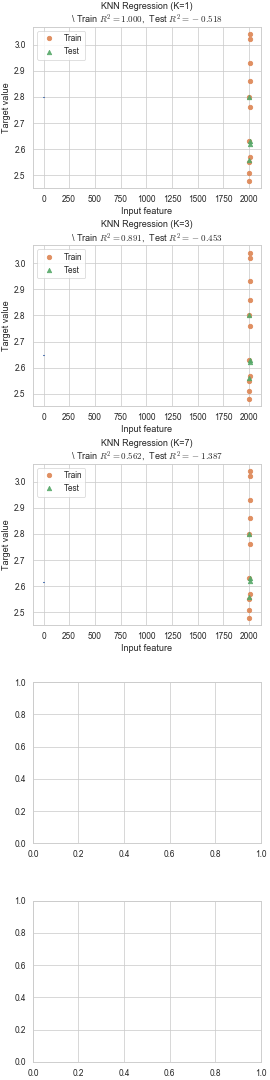

subaxes:  [<matplotlib.axes._subplots.AxesSubplot object at 0x00000013766FBCC8>


In [21]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
# X_R1, y_R1 from regresion of one input variable (above)
X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state = 0)

print('subaxes: ', subaxes)

for thisaxis, K in zip(subaxes, [1, 3, 7]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\ Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [22]:
from sklearn.linear_model import LinearRegression

# X_R1, y_R1 from regresion of one input variable (above)
X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [0.03]
linear model intercept (b): -60.705
R-squared score (training): 0.562
R-squared score (test): -3.174


<IPython.core.display.Javascript object>


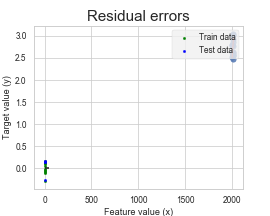

In [23]:
plt.figure(figsize=(5,4))
plt.scatter(X_waste, y_waste, marker= 'o', s=50, alpha=0.8)
plt.plot(X_waste, linreg.coef_ * X_waste + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [64]:
#  Check here how it is applied the points above
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('waste')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

waste
ridge regression linear model intercept: 3.136365863260576
ridge regression linear model coeff:
[0.17]
R-squared score (training): 0.107
R-squared score (test): -0.165
Number of non-zero features: 1


In [26]:
#  Check here how it is applied the points above
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('waste')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

waste
ridge regression linear model intercept: 2.7276641441756704
ridge regression linear model coeff:
[0.03]
R-squared score (training): 0.062
R-squared score (test): -1.029
Number of non-zero features: 1


In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_waste, y_waste, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sometimes with some data you get a convergence warning, in that case you can set
# max_iter to a larger value that typically os 20,000 or more, which will increase 
# the computation time accordingly
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('waste dataset')
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
print('Number of coeff:\n{}'.format(len(linlasso.coef_)))
print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))
print('All Features', list(X_waste))
print('Features with non-zero weight (sorted by absolute magnitude):')

# Descending magnitude
for e in sorted(list(zip(list(X_waste), linlasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

waste dataset
lasso regression linear model intercept: 2.7409090909090907
lasso regression linear model coeff:
[0.]
Number of coeff:
1
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.981

All Features ['year']
Features with non-zero weight (sorted by absolute magnitude):


In [30]:
import statsmodels.api as sm

In [34]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

Coefficients: 
 [0.03]
Variance score: -3.1738911637456813


In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [44]:
waste.tail()

,year,waste_disposed_of,waste_recycled
10,2010,2.76,3.76
11,2011,2.86,4.04
12,2012,2.93,4.34
13,2013,3.02,4.83
14,2014,3.04,4.47


<IPython.core.display.Javascript object>


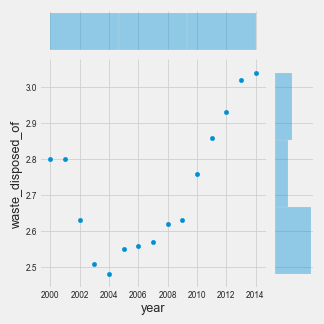

In [49]:
sns.jointplot(x='year',y='waste_disposed_of',data=waste)



<IPython.core.display.Javascript object>


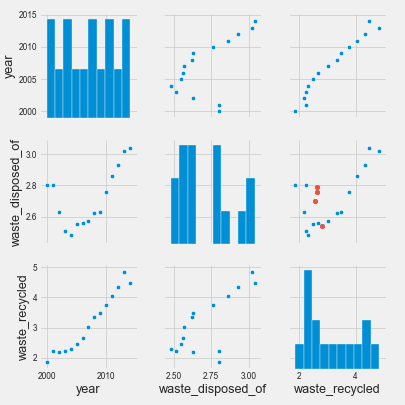

In [50]:
sns.pairplot(waste)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.03]


In [55]:
predictions = lm.predict( X_test)

In [56]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(285.72531250000003, 0.5, 'Predicted Y')

In [57]:
waste.corr()

,year,waste_disposed_of,waste_recycled
year,1.000000,0.603322,0.976911
waste_disposed_of,0.603322,1.000000,0.721157
waste_recycled,0.976911,0.721157,1.000000


In [58]:
plt.scatter(y_test,predictions)

In [74]:
X = waste.drop(['waste_disposed_of'], axis=1)
y = waste.waste_disposed_of

#X = waste.drop(['waste_recycled'], axis=1)
#y = waste.waste_recycled


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [77]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)


In [80]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [81]:
rescaledX = scaler.transform(X)